# Fixed Antivirus Market Analysis with Supabase

This notebook fixes the column reference issues and works with your actual database schema.

## Prerequisites
1. Ensure `.env` file is configured with your Supabase credentials
2. Install required packages: `pip install supabase pandas matplotlib plotly python-dotenv`

In [1]:
# Import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from supabase import create_client, Client
from dotenv import load_dotenv
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Load environment variables
load_dotenv()

print("📚 Fixed Supabase Analysis Notebook Loaded!")
print("Environment variables loaded:", bool(os.getenv('SUPABASE_URL')))

📚 Fixed Supabase Analysis Notebook Loaded!
Environment variables loaded: True


## 1. Setup Supabase Connection

In [2]:
# Initialize Supabase client
SUPABASE_URL = os.getenv('SUPABASE_URL')
SUPABASE_KEY = os.getenv('SUPABASE_ANON_KEY')

if not SUPABASE_URL or not SUPABASE_KEY:
    print("❌ Supabase credentials not found in .env file")
    print("Please ensure SUPABASE_URL and SUPABASE_ANON_KEY are set")
else:
    supabase: Client = create_client(SUPABASE_URL, SUPABASE_KEY)
    print("✅ Supabase client initialized successfully")
    print(f"Connected to: {SUPABASE_URL}")

✅ Supabase client initialized successfully
Connected to: https://goybldxsztgkcipfhpyd.supabase.co


## 2. Test Connection and Explore Schema

In [3]:
# Test connection and explore the actual schema
try:
    # Test collection_jobs table
    response = supabase.table('collection_jobs').select('*').limit(3).execute()
    
    if response.data:
        print(f"✅ Connection successful! Found {len(response.data)} collection jobs")
        
        # Show actual columns
        sample_job = response.data[0]
        print(f"\nCollection Jobs columns: {list(sample_job.keys())}")
        
        # Show sample data
        print("\nSample jobs:")
        for job in response.data:
            print(f"  Job {job['id']}: Status={job['status']}, Reviews={job.get('reviews_collected', 0)}")
    else:
        print("📊 Connection successful but no collection jobs found")
        
except Exception as e:
    print(f"❌ Connection test failed: {str(e)}")

✅ Connection successful! Found 3 collection jobs

Collection Jobs columns: ['id', 'job_uuid', 'product_id', 'platform_id', 'job_type', 'parameters', 'status', 'total_reviews_found', 'reviews_collected', 'reviews_processed', 'reviews_failed', 'collection_rate_per_minute', 'processing_rate_per_minute', 'error_message', 'error_count', 'retry_count', 'max_retries', 'scheduled_at', 'started_at', 'completed_at', 'next_run_at', 'created_by', 'created_at', 'updated_at']

Sample jobs:
  Job 94: Status=completed, Reviews=0
  Job 95: Status=completed, Reviews=0
  Job 96: Status=completed, Reviews=50000


In [4]:
# Explore reviews table schema
try:
    response = supabase.table('reviews').select('*').limit(2).execute()
    
    if response.data:
        print(f"✅ Reviews table accessible: {len(response.data)} sample records")
        
        # Show actual columns
        sample_review = response.data[0]
        print(f"\nReviews columns: {list(sample_review.keys())}")
        
        # Show sample data structure
        print("\nSample review data:")
        for key, value in sample_review.items():
            if value is not None:
                value_str = str(value)[:50] + "..." if len(str(value)) > 50 else str(value)
                print(f"  {key}: {value_str}")
            
    else:
        print("📊 Reviews table exists but no data found")
        
except Exception as e:
    print(f"❌ Reviews table error: {str(e)}")

✅ Reviews table accessible: 2 sample records

Reviews columns: ['id', 'product_id', 'platform_id', 'platform_review_id', 'user_name', 'user_id', 'title', 'content', 'rating', 'review_date', 'country_code', 'country_name', 'language_code', 'language_name', 'helpful_count', 'total_votes', 'verified_purchase', 'version_reviewed', 'review_source_url', 'word_count', 'character_count', 'has_images', 'has_video', 'sentiment_score', 'sentiment_label', 'confidence_score', 'key_topics', 'issues_mentioned', 'features_mentioned', 'suggested_improvements', 'competitive_mentions', 'priority_level', 'requires_response', 'response_urgency', 'processed_at', 'processing_version', 'ai_model_used', 'processing_duration_ms', 'spam_probability', 'authenticity_score', 'helpfulness_score', 'created_at', 'updated_at']

Sample review data:
  id: 258303
  product_id: 21
  platform_id: 11
  platform_review_id: 7f94277d-ef00-4efb-b740-8837765104cd
  user_name: John Clark
  user_id: https://play-lh.googleuserconten

## 3. Get Reviews Data (Fixed)

In [5]:
# Fetch reviews with correct column names
try:
    # Use the actual column names from your schema
    response = supabase.table('reviews').select(
        'id, rating, review_date, title, content, user_name, product_id, platform_id, '
        'sentiment_score, sentiment_label, key_topics, issues_mentioned'
    ).limit(1000).execute()
    
    reviews_df = pd.DataFrame(response.data)
    
    if not reviews_df.empty:
        # Convert data types
        reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])
        reviews_df['rating'] = pd.to_numeric(reviews_df['rating'], errors='coerce')
        
        print(f"✅ Retrieved {len(reviews_df)} reviews")
        print(f"Date range: {reviews_df['review_date'].min()} to {reviews_df['review_date'].max()}")
        print(f"Rating range: {reviews_df['rating'].min()} to {reviews_df['rating'].max()}")
        
        # Show column info
        print(f"\nAvailable columns: {list(reviews_df.columns)}")
        
        # Show sample data with correct column names
        print("\nSample reviews:")
        sample_cols = ['rating', 'review_date', 'title']
        available_cols = [col for col in sample_cols if col in reviews_df.columns]
        if available_cols:
            display(reviews_df[available_cols].head())
        
    else:
        print("📊 No reviews found in database")
        reviews_df = pd.DataFrame()
        
except Exception as e:
    print(f"❌ Error fetching reviews: {str(e)}")
    reviews_df = pd.DataFrame()

✅ Retrieved 1000 reviews
Date range: 2022-06-10 14:55:17+00:00 to 2023-09-06 17:14:09+00:00
Rating range: 1 to 5

Available columns: ['id', 'rating', 'review_date', 'title', 'content', 'user_name', 'product_id', 'platform_id', 'sentiment_score', 'sentiment_label', 'key_topics', 'issues_mentioned']

Sample reviews:


,rating,review_date,title
0,1,2023-09-06 17:14:09+00:00,None
1,4,2022-11-05 17:01:48+00:00,None
2,5,2022-11-05 16:58:05+00:00,None
3,5,2022-11-05 16:18:05+00:00,None
4,5,2022-11-05 15:39:57+00:00,None


## 4. Basic Analysis - Rating Distribution (Fixed)

📊 BASIC REVIEW STATISTICS
Total Reviews: 1,000
Average Rating: 4.57
Most Common Rating: 5

⭐ Rating Distribution:
  1★: 61 reviews (6.1%)
  2★: 13 reviews (1.3%)
  3★: 33 reviews (3.3%)
  4★: 84 reviews (8.4%)
  5★: 809 reviews (80.9%)


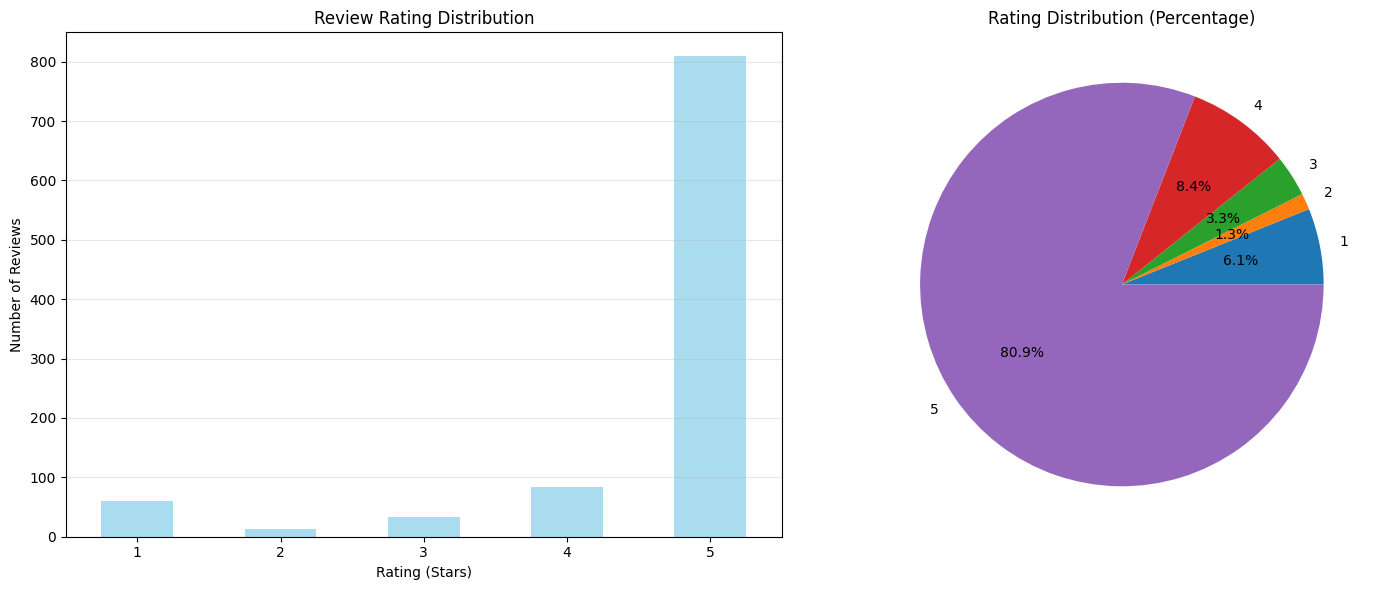

In [7]:
if not reviews_df.empty and 'rating' in reviews_df.columns:
    # Basic statistics
    print("📊 BASIC REVIEW STATISTICS")
    print("=" * 40)
    print(f"Total Reviews: {len(reviews_df):,}")
    print(f"Average Rating: {reviews_df['rating'].mean():.2f}")
    
    # Check for mode
    mode_rating = reviews_df['rating'].mode()
    if not mode_rating.empty:
        print(f"Most Common Rating: {mode_rating.iloc[0]}")
    
    # Rating distribution
    rating_counts = reviews_df['rating'].value_counts().sort_index()
    print("\n⭐ Rating Distribution:")
    for rating, count in rating_counts.items():
        percentage = (count / len(reviews_df)) * 100
        print(f"  {rating}★: {count:,} reviews ({percentage:.1f}%)")
        
    # Visualize rating distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Bar chart
    rating_counts.plot(kind='bar', color='skyblue', alpha=0.7, ax=ax1)
    ax1.set_title('Review Rating Distribution')
    ax1.set_xlabel('Rating (Stars)')
    ax1.set_ylabel('Number of Reviews')
    ax1.tick_params(axis='x', rotation=0)
    ax1.grid(axis='y', alpha=0.3)
    
    # Pie chart
    rating_counts.plot(kind='pie', autopct='%1.1f%%', ax=ax2)
    ax2.set_title('Rating Distribution (Percentage)')
    ax2.set_ylabel('')  # Remove default ylabel
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No rating data available for analysis")

## 5. Get Product Information (Fixed)

In [8]:
# Get products and platforms information separately (no joins needed)
try:
    # Get products
    products_response = supabase.table('products').select('*').execute()
    products_df = pd.DataFrame(products_response.data)
    
    if not products_df.empty:
        print(f"✅ Found {len(products_df)} products")
        print("Products available:")
        for _, product in products_df.iterrows():
            print(f"  ID {product['id']}: {product['name']} ({product['company']})")
        
        # Create product lookup
        product_lookup = dict(zip(products_df['id'], products_df['name']))
        company_lookup = dict(zip(products_df['id'], products_df['company']))
    else:
        print("📊 No products found")
        product_lookup = {}
        company_lookup = {}
        
except Exception as e:
    print(f"❌ Error fetching products: {str(e)}")
    product_lookup = {}
    company_lookup = {}

try:
    # Get platforms
    platforms_response = supabase.table('platforms').select('*').execute()
    platforms_df = pd.DataFrame(platforms_response.data)
    
    if not platforms_df.empty:
        print(f"\n✅ Found {len(platforms_df)} platforms")
        print("Platforms available:")
        for _, platform in platforms_df.iterrows():
            print(f"  ID {platform['id']}: {platform['name']} ({platform['display_name']})")
        
        # Create platform lookup
        platform_lookup = dict(zip(platforms_df['id'], platforms_df['name']))
    else:
        print("📊 No platforms found")
        platform_lookup = {}
        
except Exception as e:
    print(f"❌ Error fetching platforms: {str(e)}")
    platform_lookup = {}

✅ Found 8 products
Products available:
  ID 19: Norton 360 (NorTech (Broadcom))
  ID 20: Norton AntiVirus Plus (NorTech (Broadcom))
  ID 21: McAfee Total Protection (McAfee)
  ID 22: McAfee AntiVirus Plus (McAfee)
  ID 23: Bitdefender Total Security (Bitdefender)
  ID 24: Bitdefender Antivirus Plus (Bitdefender)
  ID 25: Kaspersky Internet Security (Kaspersky)
  ID 26: Kaspersky Anti-Virus (Kaspersky)

✅ Found 9 platforms
Platforms available:
  ID 10: apple_store (Apple App Store)
  ID 11: google_play (Google Play Store)
  ID 12: amazon (Amazon)
  ID 13: trustpilot (Trustpilot)
  ID 14: pcworld (PCWorld)
  ID 15: techradar (TechRadar)
  ID 16: cnet (CNET)
  ID 17: best_buy (Best Buy)
  ID 18: reddit (Reddit)


## 6. Enhanced Reviews Analysis with Product Names

In [9]:
# Add product and platform names to reviews data
if not reviews_df.empty and product_lookup and platform_lookup:
    # Map product and platform names
    reviews_df['product_name'] = reviews_df['product_id'].map(product_lookup)
    reviews_df['company_name'] = reviews_df['product_id'].map(company_lookup)
    reviews_df['platform_name'] = reviews_df['platform_id'].map(platform_lookup)
    
    print("✅ Enhanced reviews data with product and platform information")
    
    # Product breakdown
    print("\n📱 Product Analysis:")
    product_summary = reviews_df.groupby('product_name').agg({
        'rating': ['count', 'mean'],
        'platform_name': lambda x: ', '.join(x.unique())
    }).round(2)
    
    product_summary.columns = ['Review_Count', 'Avg_Rating', 'Platforms']
    product_summary = product_summary.sort_values('Review_Count', ascending=False)
    
    display(product_summary)
    
    # Platform breakdown
    print("\n📊 Platform Analysis:")
    platform_summary = reviews_df.groupby('platform_name').agg({
        'rating': ['count', 'mean']
    }).round(2)
    
    platform_summary.columns = ['Review_Count', 'Avg_Rating']
    display(platform_summary)
    
else:
    print("⚠️ Cannot enhance reviews data - missing product/platform information")

✅ Enhanced reviews data with product and platform information

📱 Product Analysis:


,Review_Count,Avg_Rating,Platforms
product_name,,,
Norton 360,960,4.60,google_play
McAfee Total Protection,40,3.85,google_play



📊 Platform Analysis:


,Review_Count,Avg_Rating
platform_name,,
google_play,1000,4.57


## 7. Quick Summary Report

In [10]:
# Generate a quick summary report
print("📊 QUICK SUMMARY REPORT")
print("=" * 50)
print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

if not reviews_df.empty:
    print(f"\n📈 Data Overview:")
    print(f"  • Total Reviews Analyzed: {len(reviews_df):,}")
    
    if 'product_name' in reviews_df.columns:
        unique_products = reviews_df['product_name'].dropna().nunique()
        print(f"  • Products Covered: {unique_products}")
        
    if 'platform_name' in reviews_df.columns:
        platforms = reviews_df['platform_name'].dropna().unique()
        print(f"  • Platforms: {', '.join(platforms)}")
        
    if 'review_date' in reviews_df.columns:
        date_range = f"{reviews_df['review_date'].min().strftime('%Y-%m-%d')} to {reviews_df['review_date'].max().strftime('%Y-%m-%d')}"
        print(f"  • Date Range: {date_range}")
    
    print(f"\n⭐ Rating Analysis:")
    if 'rating' in reviews_df.columns:
        avg_rating = reviews_df['rating'].mean()
        print(f"  • Overall Average Rating: {avg_rating:.2f}★")
        
        # Best and worst rated products
        if 'product_name' in reviews_df.columns:
            product_ratings = reviews_df.dropna(subset=['product_name']).groupby('product_name')['rating'].mean().sort_values(ascending=False)
            if not product_ratings.empty:
                print(f"  • Highest Rated Product: {product_ratings.index[0]} ({product_ratings.iloc[0]:.2f}★)")
                if len(product_ratings) > 1:
                    print(f"  • Lowest Rated Product: {product_ratings.index[-1]} ({product_ratings.iloc[-1]:.2f}★)")
        
        # Most reviewed product
        if 'product_name' in reviews_df.columns:
            product_counts = reviews_df['product_name'].value_counts()
            if not product_counts.empty:
                print(f"  • Most Reviewed Product: {product_counts.index[0]} ({product_counts.iloc[0]:,} reviews)")
    
    # Quality metrics
    if 'rating' in reviews_df.columns:
        poor_reviews_pct = (reviews_df['rating'] <= 2).sum() / len(reviews_df) * 100
        excellent_reviews_pct = (reviews_df['rating'] == 5).sum() / len(reviews_df) * 100
        
        print(f"\n🚨 Quality Metrics:")
        print(f"  • Poor Reviews (1-2★): {poor_reviews_pct:.1f}%")
        print(f"  • Excellent Reviews (5★): {excellent_reviews_pct:.1f}%")
        
        if poor_reviews_pct > 20:
            print(f"  ⚠️ Warning: High percentage of poor reviews detected!")
        elif excellent_reviews_pct > 50:
            print(f"  ✅ Positive: Strong customer satisfaction indicated!")
    
    # AI insights if available
    if 'sentiment_label' in reviews_df.columns:
        sentiment_data = reviews_df[reviews_df['sentiment_label'].notna()]
        if not sentiment_data.empty:
            positive_pct = (sentiment_data['sentiment_label'] == 'positive').sum() / len(sentiment_data) * 100
            print(f"\n🤖 AI Insights:")
            print(f"  • Sentiment Analysis Available: {len(sentiment_data):,} reviews")
            print(f"  • Positive Sentiment: {positive_pct:.1f}%")
            
else:
    print("\n❌ No data available for analysis")
    print("💡 Suggestions:")
    print("  • Check your Supabase connection")
    print("  • Verify data exists in your database")
    print("  • Run data collection first")

print(f"\n" + "=" * 50)
print(f"📚 Analysis complete! Check the visualizations above for insights.")

📊 QUICK SUMMARY REPORT
Analysis Date: 2025-06-22 09:40:46

📈 Data Overview:
  • Total Reviews Analyzed: 1,000
  • Products Covered: 2
  • Platforms: google_play
  • Date Range: 2022-06-10 to 2023-09-06

⭐ Rating Analysis:
  • Overall Average Rating: 4.57★
  • Highest Rated Product: Norton 360 (4.60★)
  • Lowest Rated Product: McAfee Total Protection (3.85★)
  • Most Reviewed Product: Norton 360 (960 reviews)

🚨 Quality Metrics:
  • Poor Reviews (1-2★): 7.4%
  • Excellent Reviews (5★): 80.9%
  ✅ Positive: Strong customer satisfaction indicated!

🤖 AI Insights:
  • Sentiment Analysis Available: 1,000 reviews
  • Positive Sentiment: 89.1%

📚 Analysis complete! Check the visualizations above for insights.
